In [39]:
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn

In [ ]:
# Reading & Cleaning Data

# Creating dataframe
health = pd.read_csv('fetal_health.csv')
df = pd.DataFrame(health)

# Checking NAs
df.head(5)
df.isna().sum()

# Recoding target variable
df['fetal_health'] = df['fetal_health'].replace({
    1.0 : 'Normal',
    2.0 : 'Suspicious',
    3.0 : 'Pathological'
})

# Dropping Duplicates
df = df.drop_duplicates(subset = None, keep = 'first')

df = df.sort_values('fetal_health', ascending = False)
df['fetal_health'].value_counts()

/var/folders/w0/z4lwkdj537z67kqfrzdt95bc0000gn/T/ipykernel_39537/3378662253.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  g = sns.catplot(x = 'fetal_health', data = df, kind = 'count', order = order, palette = color)


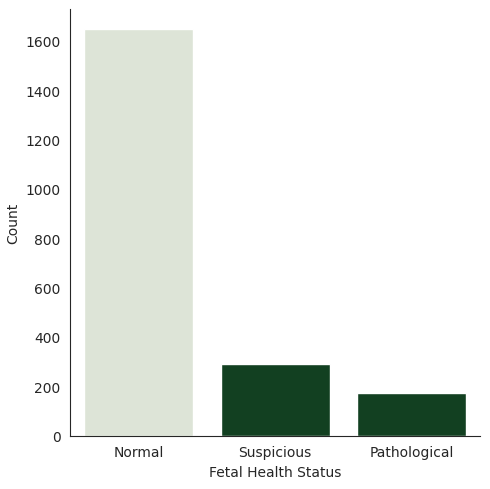

In [187]:
# Demonstrate Data Imbalance

order = df['fetal_health'].value_counts().index

color = ['#dde6d5', '#0a481e', '#0a481e']

with sns.axes_style('white'):
    g = sns.catplot(x = 'fetal_health', data = df, kind = 'count', order = order, palette = color)
    g.set_xlabels('Fetal Health Status')
    g.set_ylabels('Count')


In [124]:
# Train-Test Split

from sklearn.model_selection import train_test_split

X_health = df.drop('fetal_health', axis = 1)
y_health = df['fetal_health']
Xtrain, Xtest, ytrain, ytest = train_test_split(X_health, y_health, test_size = 0.2, random_state = 42, stratify = y_health) # Stratify helps keep the original data's class ratio across all the sets



In [233]:
# Gaussian 1.0 Model
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

model = GaussianNB()
model.fit(Xtrain, ytrain)

y_model_NB = model.predict(Xtest)
f1_score(ytest, y_model_NB, average = 'macro') # Macro calculates F1 per class, then averages. Better when prioritizing smaller classes
# accuracy_score(ytest, y_model_NB)

0.6881799220517394

[Text(0, 0.5, 'Normal'),
 Text(0, 1.5, 'Suspicious'),
 Text(0, 2.5, 'Pathological')]

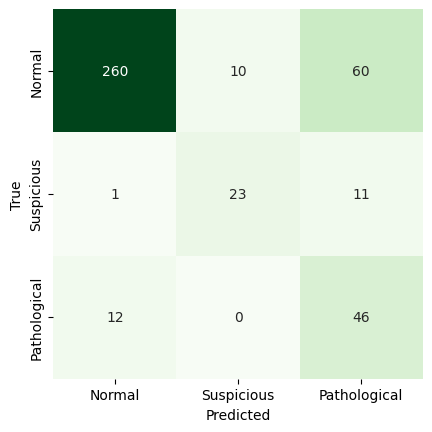

In [176]:
# Gaussian 1.0 Confusion Model

from sklearn.metrics import confusion_matrix

mat = confusion_matrix(ytest, y_model_NB)

g = sns.heatmap(mat, square = True, annot = True, fmt = 'g', cbar = False, cmap = 'Greens')
g.set_xlabel('Predicted')
g.set_ylabel('True')
g.set_xticklabels(['Normal', 'Suspicious', 'Pathological'])
g.set_yticklabels(['Normal', 'Suspicious', 'Pathological'])

In [232]:
# Decision Tree 1.0 Model
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(random_state = 1)
model.fit(Xtrain, ytrain)

y_model_DT = model.predict(Xtest)
f1_score(ytest, y_model_DT, average = 'macro') # Macro calculates F1 per class, then averages. Better when prioritizing smaller classes
# accuracy_score(ytest, y_model_DT)

0.8898024078669241

[Text(0, 0.5, 'Normal'),
 Text(0, 1.5, 'Suspicious'),
 Text(0, 2.5, 'Pathological')]

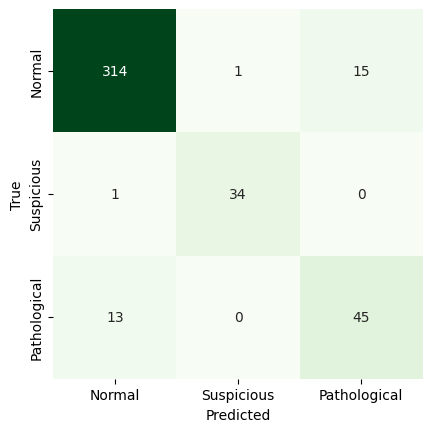

In [174]:
# Decision Trees 1.0 Confusion Model

mat = confusion_matrix(ytest, y_model_DT)

d = sns.heatmap(mat, square = True, annot = True, fmt = 'g', cbar = False, cmap = 'Greens')
d.set_xlabel('Predicted')
d.set_ylabel('True')
d.set_xticklabels(['Normal', 'Suspicious', 'Pathological'])
d.set_yticklabels(['Normal', 'Suspicious', 'Pathological'])

In [229]:
# Random Forest 1.0
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(random_state=1)
model.fit(Xtrain, ytrain)

y_model_RF = model.predict(Xtest)
f1_score(ytest, y_model_RF, average = 'macro') # Macro calculates F1 per class, then averages. Better when prioritizing smaller classes
# accuracy_score(ytest, y_model_RF)

0.921146437762752

[Text(0, 0.5, 'Normal'),
 Text(0, 1.5, 'Suspicious'),
 Text(0, 2.5, 'Pathological')]

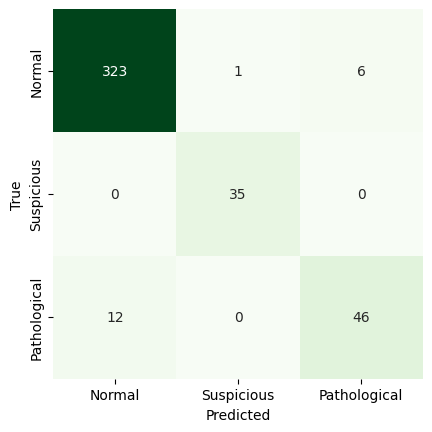

In [185]:
mat = confusion_matrix(ytest, y_model_RF)

r = sns.heatmap(mat, square = True, annot = True, fmt = 'g', cbar = False, cmap = 'Greens')
r.set_xlabel('Predicted')
r.set_ylabel('True')
r.set_xticklabels(['Normal', 'Suspicious', 'Pathological'])
r.set_yticklabels(['Normal', 'Suspicious', 'Pathological'])

In [236]:
from sklearn.feature_selection import RFECV
from sklearn.model_selection import StratifiedKFold

cv_split = StratifiedKFold(5, shuffle = True, random_state = 1)
model = RandomForestClassifier(n_estimators = 100, class_weight = 'balanced', random_state = 1)

rfecv = RFECV(estimator = model,
              step = 1,
              min_features_to_select = 1,
              cv = cv_split,
              scoring = 'f1_macro'
)


rfecv.fit(Xtrain, ytrain)

print("Number of features selected:", rfecv.n_features_)
print("Selected features:", list(Xtrain.columns[rfecv.support_]))

y_model = rfecv.predict(Xtest)
f1_score(y_pred = y_model, y_true = ytest, average = 'macro')


Number of features selected: 9
Selected features: ['baseline value', 'accelerations', 'abnormal_short_term_variability', 'mean_value_of_short_term_variability', 'percentage_of_time_with_abnormal_long_term_variability', 'mean_value_of_long_term_variability', 'histogram_mode', 'histogram_mean', 'histogram_median']


0.9348662059188375

Number of features selected: 9
Selected features: ['baseline value', 'accelerations', 'abnormal_short_term_variability', 'mean_value_of_short_term_variability', 'percentage_of_time_with_abnormal_long_term_variability', 'mean_value_of_long_term_variability', 'histogram_mode', 'histogram_mean', 'histogram_median']
